# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [134]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [135]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [136]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')        

## Have a look at the general data:

In [137]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805


In [138]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,259,263,266,271,275,280,284,290,296,301
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102,103,105,106,107,107,108,109,112,113


In [139]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29587,29886,30157,30436,30717,30978,31244,31493,31746,32006
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,877,893,893,902,902,902,908,908,909,909
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,977,977,1335,1028,1041,1063,1071,1084,1115,1144


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [140]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#calculate the number of total[cases, deaths, recovered, active]
for col in confirmed.columns:
    total_cases.append(sum(confirmed[col]))
    total_deaths.append(sum(deaths[col]))
    total_recovered.append(sum(recoveries[col]))
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

#calculate the mortarity rate and recovery rate
for i in range(len(total_cases)):
    mortality_rate.append(total_deaths[i]/total_cases[i])
    recovery_rate.append(total_recovered[i]/total_cases[i])

In [141]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])
print("The lastest mortality rate of total cases: ", mortality_rate[-1])
print("The lastest recovery rate of total cases: ", recovery_rate[-1])

Total confirmed cases:  26304856
Total death cases:  868733
Total recoveries cases:  17512585
Total active cases:  7923538
The lastest mortality rate of total cases:  0.03302557520178023
The lastest recovery rate of total cases:  0.665754832491765


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

<Figure size 432x288 with 0 Axes>

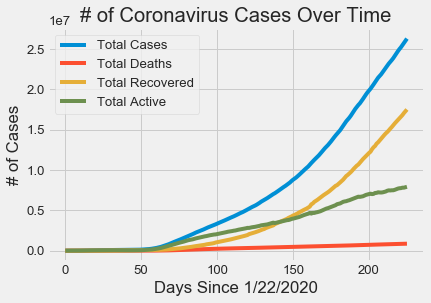

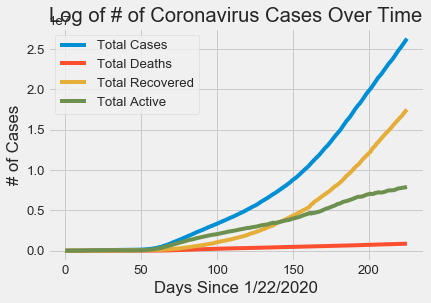

In [142]:
df = pd.DataFrame({'Total Cases': total_cases
                   ,'Total Deaths': total_deaths
                   ,'Total Recovered': total_recovered
                  ,'Total Active': total_active})

plt.figure(1)
df.plot(kind='line')
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')


plt.figure(2)
df.plot(kind='line')
plt.title('Log of # of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

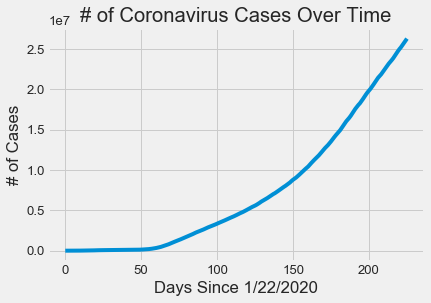

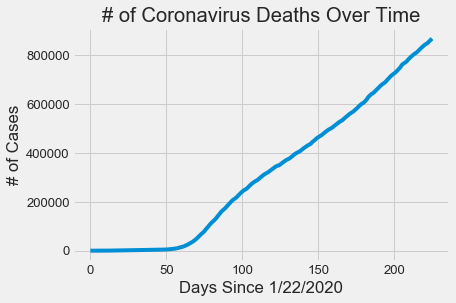

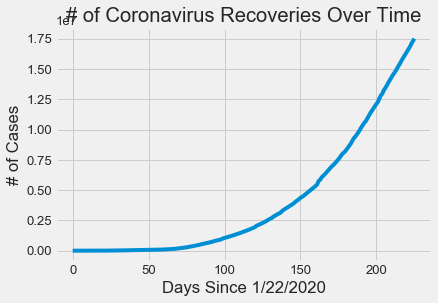

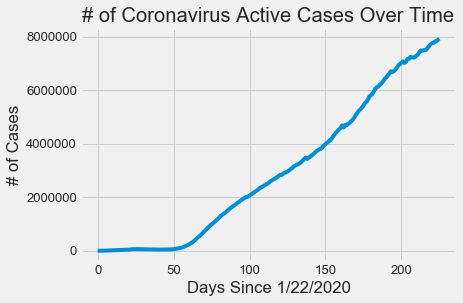

In [143]:
plt.figure(1)
plt.plot(adjusted_dates, total_cases)
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(2)
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(3)
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(4)
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [144]:
#Calculate the number of daily increase in total cases, total deaths, total recovered, and total active by time 
daily_increases_total_cases = []
daily_increases_total_deaths = []
daily_increases_total_recovered = []
daily_increases_total_active = []

for i in range(len(total_cases)):
    if i == 0:
        daily_increases_total_cases.append(0)
        daily_increases_total_deaths.append(0)
        daily_increases_total_recovered.append(0)
        daily_increases_total_active.append(0)
    else:
        daily_increases_total_cases.append(total_cases[i] - total_cases[i-1])
        daily_increases_total_deaths.append(total_deaths[i] - total_deaths[i-1])
        daily_increases_total_recovered.append(total_recovered[i] - total_recovered[i-1])
        daily_increases_total_active.append(daily_increases_total_cases[i] - 
                                            (daily_increases_total_deaths[i] + daily_increases_total_recovered[i]))
        
        

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

Text(0, 0.5, '# of Cases')

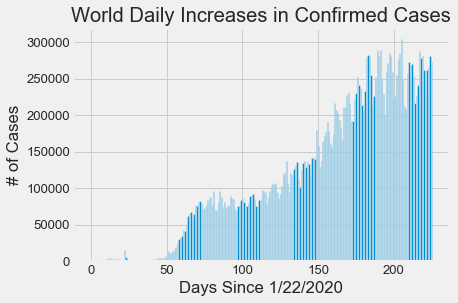

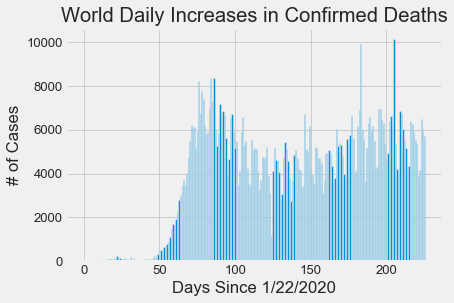

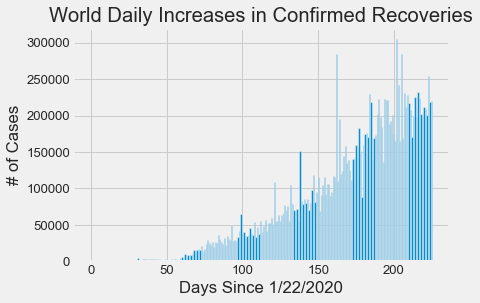

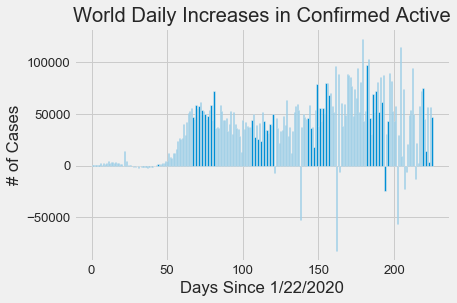

In [145]:
plt.figure(1)
plt.bar(adjusted_dates, daily_increases_total_cases)
plt.title('World Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(2)
plt.bar(adjusted_dates, daily_increases_total_deaths)
plt.title('World Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(3)
plt.bar(adjusted_dates, daily_increases_total_recovered)
plt.title('World Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(4)
plt.bar(adjusted_dates, daily_increases_total_active)
plt.title('World Daily Increases in Confirmed Active')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [146]:
#the global mortality and recovered rate in percentage by time.
mortality_rate_in_percentage = [i*100 for i in mortality_rate]
recovery_rate_in_percentage = [i*100 for i in recovery_rate]

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

<Figure size 432x288 with 0 Axes>

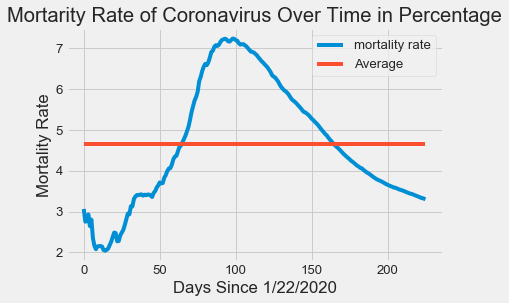

In [147]:
#get the average mortality rate of all the time
avg_mortality_rate = np.mean(mortality_rate_in_percentage)
#Transform the list into dataframe
mortality_rate_in_percentage_df = pd.DataFrame({'mortality rate':mortality_rate_in_percentage, 'Average':avg_mortality_rate})

#Visualize the mortality rate in by time (day units) using the line chart.
#
#Using the dashline to visualize the average mortality rate.
plt.figure()
mortality_rate_in_percentage_df.plot()
plt.title('Mortarity Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Mortality Rate')
plt.legend()

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

<Figure size 432x288 with 0 Axes>

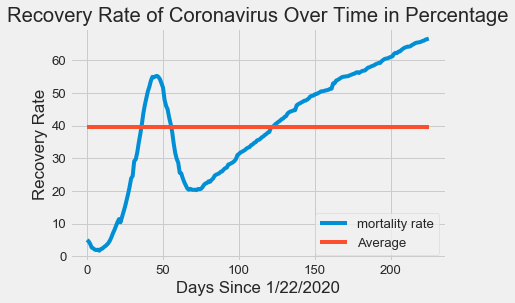

In [148]:
#get the average recovery rate of all the time
avg_recovery_rate = np.mean(recovery_rate_in_percentage)
#Transform the list into dataframe
recovery_rate_in_percentage_df = pd.DataFrame({'mortality rate': recovery_rate_in_percentage, 'Average':avg_recovery_rate})

#Visualize the mortality rate in by time (day units) using the line chart.
#
#Using the dashline to visualize the average mortality rate.
plt.figure()
recovery_rate_in_percentage_df.plot()
plt.title('Recovery Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Recovery Rate')
plt.legend()

#  5. Continent Analysis

## Data Prerocessing

In [149]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [150]:
#getting continent code for country
confirmed_df_continent = []
deaths_df_continent = []
recoveries_df_continent = []

for i in range(len(confirmed_df)):
    confirmed_df_country = confirmed_df['Country/Region'][i]
    deaths_df_country = confirmed_df['Country/Region'][i]
    
    confirmed_df_continent_code = country_to_continent_code(confirmed_df_country)
    deaths_df_continent_code = country_to_continent_code(deaths_df_country)
    
    confirmed_df_continent.append(continents[confirmed_df_continent_code])
    deaths_df_continent.append(continents[deaths_df_continent_code])

for i in range(len(recoveries_df)):
    recoveries_df_country = recoveries_df['Country/Region'][i]
    recoveries_df_continent_code = country_to_continent_code(recoveries_df_country)
    recoveries_df_continent.append(continents[recoveries_df_continent_code])

    
#add the field "continent" into: 
confirmed_df['continent'] = confirmed_df_continent
deaths_df['continent'] = deaths_df_continent
recoveries_df['continent'] = recoveries_df_continent

In [151]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,continent
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,Asia
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,Europe
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,Africa
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,Europe
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,Africa


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Confirmed: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [152]:
#columns for contries_df data frame
continent = []
Confirmed = list(confirmed_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Deaths = list(deaths_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Recoveries = list(recoveries_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Active = []
Mortality_rate = []

countries = sorted(list(set(confirmed_df['Country/Region'])))
countries_df = pd.DataFrame()
countries_df['Country/Region'] = countries
countries_df['Lat'] = confirmed_df['Lat']
countries_df['Long'] = confirmed_df['Long']
countries_df['continent'] = confirmed_df['continent']
countries_df['Confirmed'] = Confirmed
countries_df['Deaths'] = Deaths
countries_df['Recoveries'] = Recoveries
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Deaths'] + countries_df['Recoveries'])
countries_df['Mortality Rate'] = (countries_df['Deaths'] / countries_df['Confirmed'])*100.00

countries_df = countries_df.set_index('Country/Region')
countries_df

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,,,
Afghanistan,33.939110,67.709953,Asia,38288,1409,29390,7489,3.680004
Albania,41.153300,20.168300,Europe,9844,301,5732,3811,3.057700
Algeria,28.033900,1.659600,Africa,45469,1529,32006,11934,3.362731
Andorra,42.506300,1.521800,Europe,1199,53,909,237,4.420350
Angola,-11.202700,17.873900,Africa,2805,113,1144,1548,4.028520
...,...,...,...,...,...,...,...,...
West Bank and Gaza,-18.665695,35.529562,Africa,24471,167,16095,8209,0.682440
Western Sahara,-22.957600,18.490400,Africa,10,1,8,1,10.000000
Yemen,28.166700,84.250000,Asia,1979,571,1180,228,28.852956



# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [153]:
#columns for contries_df data frame
continent = []
Confirmed = list(confirmed_df.groupby('continent').sum().loc[:, cols[-1]])
Deaths = list(deaths_df.groupby('continent').sum().loc[:, cols[-1]])
Recoveries = list(recoveries_df.groupby('continent').sum().loc[:, cols[-1]])
Active = []
Mortality_rate = []

continent = sorted(list(set(confirmed_df['continent'])))
continent_df = pd.DataFrame()
continent_df['continent'] = continent
continent_df['Confirmed'] = Confirmed
continent_df['Deaths'] = Deaths
continent_df['Recoveries'] = Recoveries
continent_df['Active'] = continent_df['Confirmed'] - (continent_df['Deaths'] + continent_df['Recoveries'])
continent_df['Mortality Rate'] = (continent_df['Deaths'] / continent_df['Confirmed'])*100.00

continent_df = continent_df.set_index('continent')
continent_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,1275853,30616,1013901,231336,2.399649
Asia,7388790,147088,5932471,1309231,1.990691
Australia,28400,766,23797,3837,2.697183
Europe,3725585,208937,2023211,1493437,5.608166
North America,7326924,272694,3158314,3895916,3.721807
Others,39035,677,25938,12420,1.734341
South America,6520269,207955,5334953,977361,3.189362


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [154]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats): 
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [155]:
continent = set(confirmed_df['continent'])


#deaths = deaths_df.groupby('continent').sum()
visualize_covid_cases(confirmed, deaths, continent=continent, figure=)



SyntaxError: invalid syntax (<ipython-input-155-6ef57a6e1d9b>, line 5)


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

# Problem 12
    Visualize the covariance matrix for continents_df.

In [ ]:
cols = continent_df.columns
covariance = continent_df.corr()

plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
hm = sns.heatmap(covariance,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                )
hm.set_xticklabels(cols , rotation=90 ) ;

plt.tight_layout()
plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

In [ ]:
#get the number of confirmed, deaths, recoveries, and active of the 7 continents.
confirmed_by_continent = continent_df['Confirmed']
deaths_by_continent = continent_df['Deaths']
recoveries_by_continent = continent_df['Recoveries']
active_by_continent = continent_df['Active']

#set up for pie chart
colors = ['red', '#4682b4', '#228b22', '#800080', '#ffff00', '#a52a2a', '#ff69b4']
labels = continent_df.index
title1 = 'World Total Confirmed COVID-19 Cases By Continents\n' + str(sum(confirmed_by_continent)) #total of confirmed cases
title2 = 'World Total Deaths COVID-19 Cases By Continents\n' + str(sum(deaths_by_continent))
title3 = 'World Total Recoveries COVID-19 Cases By Continents\n' + str(sum(recoveries_by_continent))
title4 = 'World Total Active COVID-19 Cases By Continents\n' + str(sum(active_by_continent))

#plot confirmed cases in pie chart
plt.figure(1, figsize=(15,15))
plt.pie(confirmed_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title1, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot deaths cases in pie chart
plt.figure(2, figsize=(15,15))
plt.pie(deaths_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title2, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot recoveries cases in pie chart
plt.figure(3, figsize=(15,15))
plt.pie(recoveries_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title3, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot active cases in pie chart
plt.figure(4, figsize=(15,15))
plt.pie(active_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title4, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)
plt.show()



# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="Worldmap for countries in 2016")
latitude = []
long = []
for i in countries_df.index:
    if i != None:
        location = geolocator.geocode(i)
        if location!=None:
            latitude.append(location.latitude)#, location.longitude)
            long.append(location.longitude)
        else:
            latitude.append(float("Nan"))#, location.longitude)
            long.append(float("Nan"))
    else:
        latitude.append(float("Nan"))#, location.longitude)
        long.append(float("Nan"))
        
countries_df["Latitude"] = latitude
countries_df['Longtitude'] = long

In [ ]:
plt.figure(figsize=(20,10))
m2=folium.Map(location=[33.768006,66.238514], )
m2


# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [156]:
#Insert your code here:



# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [157]:
top_10_countries_by_confirmed_case = countries_df.sort_values('Confirmed',ascending=False).head(10)
top_10_countries_by_confirmed_case.head(10)

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,,,
USA,35.937500,14.375400,Europe,6150016,186790,2266957,3696269,3.037228
Brazil,50.833300,4.469936,Europe,4041638,124614,3429435,487589,3.083255
India,35.745200,95.995600,Asia,3936747,68472,3037151,831124,1.739304
Russia,41.902900,12.453400,Others,1006923,17479,824783,164661,1.735882
Peru,39.074200,21.824300,Europe,657129,29068,480177,147884,4.423485
Colombia,11.550000,104.916700,Asia,641574,20618,489151,131805,3.213659
South Africa,35.907757,127.766922,Asia,633015,14563,554887,63565,2.300577
Mexico,58.595300,25.013600,Europe,616894,66329,510626,39939,10.752090
Spain,41.204380,74.766098,Asia,488513,29234,150376,308903,5.984283


# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

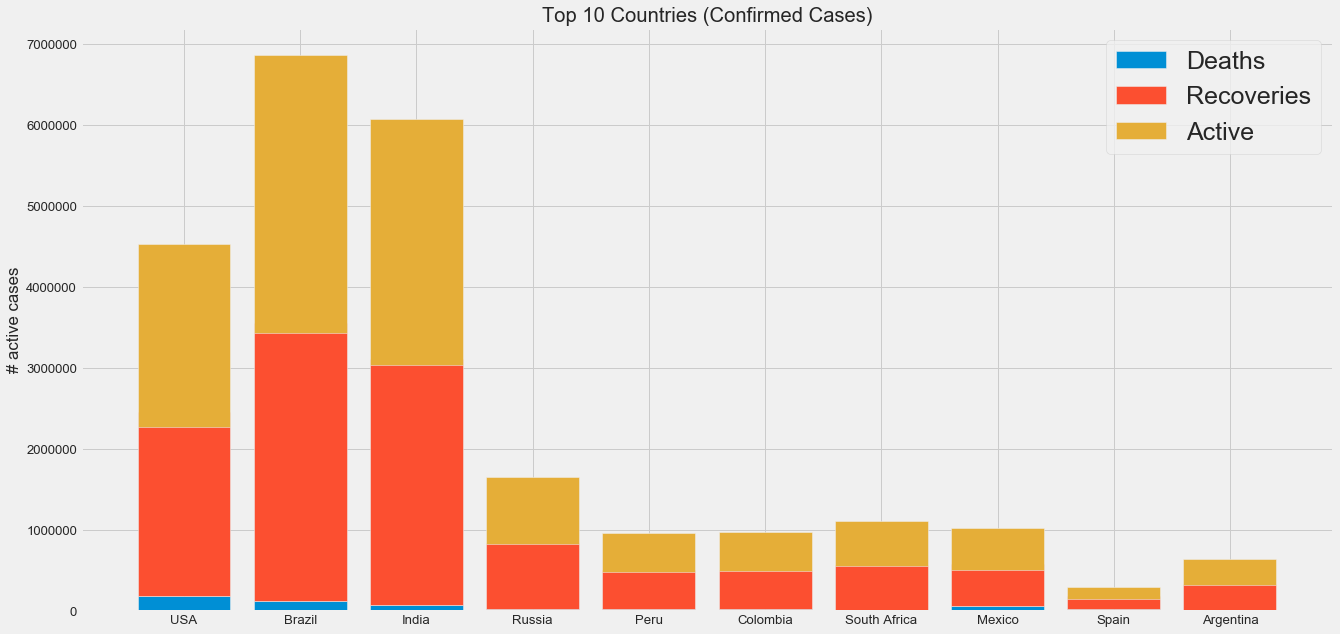

In [158]:
### top 10 confirmed countries with number active, recoveries and deaths cases
top_10_countries_by_deaths_case = top_10_countries_by_confirmed_case['Deaths']
top_10_countries_by_recoveries_case = top_10_countries_by_confirmed_case['Recoveries']
top_10_countries_by_active_case = top_10_countries_by_confirmed_case['Active']
#get countries name for bar chart
labels = top_10_countries_by_active_case.index

plt.figure(1, figsize=(20,10))
plt.bar(labels, top_10_countries_by_deaths_case, label='Deaths')
plt.bar(labels, top_10_countries_by_recoveries_case, bottom=top_10_countries_by_deaths_case,
       label='Recoveries')
plt.bar(labels, top_10_countries_by_recoveries_case, bottom=top_10_countries_by_recoveries_case,
       label='Active')

plt.ylabel('# active cases')
plt.title('Top 10 Countries (Confirmed Cases)')
plt.legend(loc='best', prop={'size': 25})

plt.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [176]:
confirmed_cases_group_by_continent = confirmed_df.groupby('continent').sum()
confirmed_by_date = confirmed_cases_group_by_continent.loc[:,cols[4:]]
confirmed_last_10_days = []

for i in confirmed_by_date.index:
    continent_cols = confirmed_by_date.columns
    continent_cols = continent_cols[-11:]
    confirmed_date = []
    for j in range(len(continent_cols)):
        if j == 0:
            pass
        else:
            confirmed_date.append(
                confirmed_by_date.loc[i,continent_cols[j]] -
                                      confirmed_by_date.loc[i,continent_cols[j-1]])
    confirmed_date = confirmed_date[1:]
    confirmed_last_10_days.append(sum(confirmed_date))


[72769, 939223, 1054, 291140, 464041, 5401, 645391]

In [184]:
#19.1
#continent has the highest death rate over continents' active cases
continent_has_highest_death_rate = continent_df.sort_values('Mortality Rate', ascending=False).head(1)
print('Continent has the highest death rate over continents:', continent_has_highest_death_rate.index[0])

#19.2
#continent has the highest rate on COVID 2019 spread rate over continents' active cases?
confirmed_cases_group_by_continent = confirmed_df.groupby('continent').sum()
confirmed_by_date = confirmed_cases_group_by_continent.loc[:,cols[4:]]
confirmed_last_10_days = []

for i in confirmed_by_date.index:
    continent_cols = confirmed_by_date.columns
    continent_cols = continent_cols[-11:]
    confirmed_date = []
    for j in range(len(continent_cols)):
        if j == 0:
            pass
        else:
            confirmed_date.append(
                confirmed_by_date.loc[i,continent_cols[j]] -
                                      confirmed_by_date.loc[i,continent_cols[j-1]])
    confirmed_date = confirmed_date[1:]
    confirmed_last_10_days.append(sum(confirmed_date))

#get active cases in 
active_cases_before = daily_increases_total_active[-10]
Spread_rate = [i/active_cases_before for i in confirmed_last_10_days ]
continent_df['Spead Rate'] = Spread_rate
continent_has_highest_spead_rate = continent_df.sort_values('Spead Rate', ascending=False).head(1)
print('Continent has the highest spead rate over continents:', continent_has_highest_death_rate.index[0])

#19.3
#continent has the highest rate on COVID 2019 recoveries rate over continents' dataset

#calculate recoveries rate by recoveries cases devide for confirmed cases
recoveries_rate = [(continent_df['Recoveries'][i]/continent_df['Confirmed'][i]*100) for i in range(len(continent_df))]

#add new column 'recoveries rate' to continent_df
continent_df['Recoveries Rate'] = recoveries_rate

#get continent has hightest recoveries rate
continent_has_highest_recoveries_rate = continent_df.sort_values('Recoveries Rate', ascending=False).head(1)
print('Continent has the highest recoveries rate over continents:', continent_has_highest_recoveries_rate.index[0])


Continent has the highest death rate over continents: Europe
Continent has the highest spead rate over continents: Europe
Continent has the highest recoveries rate over continents: Australia


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [194]:
#country has the highest death rate over countries' dataset
country_has_the_highest_deah_rate = countries_df.sort_values('Mortality Rate', ascending=False).head(1)
print("The country has the highest death rate over countries' dataset:", country_has_the_highest_deah_rate.index[0])

#country has the highest rate on COVID 2019 spread rate over countries'dataset
confirmed_cases_group_by_countries = confirmed_df.groupby('Country/Region').sum()
confirmed_by_date_by_countries = confirmed_cases_group_by_countries.loc[:,cols[4:]]
confirmed_last_10_days_by_countries = []

for i in confirmed_by_date_by_countries.index:
    countries_cols = confirmed_by_date_by_countries.columns
    countries_cols = countries_cols[-11:]
    confirmed_date = []
    for j in range(len(continent_cols)):
        if j == 0:
            pass
        else:
            confirmed_date.append(
                confirmed_by_date_by_countries.loc[i,continent_cols[j]] -
                                      confirmed_by_date_by_countries.loc[i,continent_cols[j-1]])
    confirmed_date = confirmed_date[1:]
    confirmed_last_10_days_by_countries.append(sum(confirmed_date))
confirmed_last_10_days_by_countries

active_cases_before = daily_increases_total_active[-10]
Spread_rate_by_countries = [i / active_cases_before for i in confirmed_last_10_days_by_countries]
countries_df['Spead Rate'] = Spread_rate_by_countries

country_has_the_highest_spead_rate = countries_df.sort_values('Spead Rate', ascending=False).head(1)
print("The country has the highest rate on COVID 2019 spread rate over countries'dataset:", country_has_the_highest_spead_rate.index[0])


#20.3
#continent has the highest rate on COVID 2019 recoveries rate over continents' dataset

#calculate recoveries rate by recoveries cases devide for confirmed cases
recoveries_rate_by_countries = [(countries_df['Recoveries'][i]/countries_df['Confirmed'][i]*100) for i in range(len(countries_df))]

#add new column 'recoveries rate' to continent_df
countries_df['Recoveries Rate'] = recoveries_rate_by_countries

#get continent has hightest recoveries rate
country_has_highest_recoveries_rate = countries_df.sort_values('Recoveries Rate', ascending=False).head(1)
print('Continent has the highest recoveries rate over continents:', country_has_highest_recoveries_rate.index[0])



The country has the highest death rate over countries' dataset: Yemen
The country has the highest rate on COVID 2019 spread rate over countries'dataset: India
Continent has the highest recoveries rate over continents: Holy See


# Problem 21
**USA dataset**

In [195]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44878,1007,22082.0,21789.0,1,915.282617,455095.0,2914.0,2.243861,84000001,USA,9281.620008,6.493159
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1162,16,548.0,598.0,2,158.841903,123753.0,NaN,1.376936,84000002,USA,16916.662680,NaN
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,696.0,NaN,NaN,16,ASM,1250.876152,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,1393.858286,617841.0,5188.0,1.802770,84000004,USA,8488.322873,5.113597
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,803.663856,344968.0,1575.0,1.203975,84000005,USA,11431.093603,6.494042
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,271035,6441,NaN,264594.0,6,685.952294,4793353.0,NaN,2.376446,84000006,USA,12131.316935,NaN
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,34240,1691,4603.0,27946.0,8,594.574921,355655.0,5565.0,4.938668,84000008,USA,6175.921244,16.252921
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,1317.593787,524364.0,10411.0,9.234503,84000009,USA,14707.483577,22.162381
8,Delaware,US,2020-07-07 04:34:13,39.3185,-75.5071,12293,512,6778.0,5003.0,10,1262.420874,127179.0,NaN,4.164972,84000010,USA,13060.556767,NaN
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [229]:
#21.1
#state has the highest death rate over states' dataset
state_has_the_highest_death_rate = us_medical_data.sort_values('Mortality_Rate', ascending=False).head(1)

print("The state has the highest death rate over states' dataset:", (state_has_the_highest_death_rate.values[0][0]))

#21.2
#state has the highest rate on COVID 2019 spread rate over states' dataset



The state has the highest death rate over states' dataset: Connecticut


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [31]:
top_10_state_has_the_highest_new_confirmed = us_medical_data.sort_values('Mortality_Rate', ascending=False).head(01)
